**Exercise 7.21**. Simulate an ARMA(1,1) series with $\phi = 0.7$, $\theta = −0.6$, $n = 48$ but with error terms from a t-distribution with 6 degrees of freedom.

**(a)** Display the sample EACF of the series. Is an ARMA(1,1) model suggested?

**(b)** Estimate $\phi$ and $\theta$ from the series and comment on the results.

**(c)** Repeat parts (a) and (b) with a new simulated series under the same conditions.

**Solution**.

In [1]:
require(ggplot2)
require(latex2exp)

Loading required package: ggplot2

Loading required package: latex2exp



In [2]:
set.seed(10000)
Y = arima.sim(model=list(phi=0.7, ma=0.6), n=48, innov=rt(48, 6))

**(a)**

In [3]:
source('eacf.R')

In [4]:
eacf(Y)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x o o o o o o o o o o  o  o  o 
1 x o o o o o o o o o o  o  o  o 
2 o o o o o o o o o o o  o  o  o 
3 o x x o o o o o o o o  o  o  o 
4 x o o x o o o o o o o  o  o  o 
5 x o o o o o o o o o o  o  o  o 
6 x o o o o o o o o o o  o  o  o 
7 x o o o o o o o o o o  o  o  o 


No -- the EACF suggests a MA(1) model instead of an ARMA(1, 1) model.

**(b)**

In [5]:
estimate.arma11.mom <- function(x) {
    # estimate of phi:  r2 / r1
    # estimate of theta: solve r1 = (1 - theta phi) (phi - theta) / (1 - 2 theta phi + theta^2)
    #    (if it has real roots)
    
    r = acf(x, lag.max=2, plot=F)$acf[-1]
    r1 = r[1]
    r2 = r[2]
    phi = r2 / r1
    delta = (phi**2 - 1)*(phi**2 - 4 *phi *r1 + 4*r1**2 - 1)
    if (delta < 0) {
        theta = NA
    } else {
        theta = ((phi**2 - 2 * phi * r1 + 1) - sqrt(delta)) / (2 * (phi - r1))
    }
    return(c(phi, theta))
}

In [6]:
res = estimate.arma11.mom(Y)
print(c('Method of moments estimate (phi): ', round(res[1], 5)), quote=F)
print(c('Method of moments estimate (theta): ', round(res[2], 5)), quote=F)

res = arima(Y, order=c(1,0,1), method='ML')$coef
print(c('Maximum likelihood estimate (phi): ', round(res[[1]], 5)), quote=F)
print(c('Maximum likelihood estimate (theta): ', round(-res[[2]], 5)), quote=F)

[1] Method of moments estimate (phi):  -0.03963                          
[1] Method of moments estimate (theta):  -0.3751                             
[1] Maximum likelihood estimate (phi):  -0.37204                           
[1] Maximum likelihood estimate (theta):  -0.75518                             


Estimates are wildly different from the true values on both the method of moments and the maximum likelihood estimate.

**(c)**

In [7]:
set.seed(10001)
Y = arima.sim(model=list(phi=0.7, ma=0.6), n=48, innov=rt(48, 6))

In [8]:
eacf(Y)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 o o o o o o o o o o o  o  o  o 
1 x o o o o o o o o o o  o  o  o 
2 x o o o o o o o o o o  o  o  o 
3 o o o o o o o o o o o  o  o  o 
4 x o o o o o o o o o o  o  o  o 
5 x o o o o o o o o o o  o  o  o 
6 x x o o o o o o o o o  o  o  o 
7 o x o o o o o o o o o  o  o  o 


In [9]:
res = estimate.arma11.mom(Y)
print(c('Method of moments estimate (phi): ', round(res[1], 5)), quote=F)
print(c('Method of moments estimate (theta): ', round(res[2], 5)), quote=F)

res = arima(Y, order=c(1,0,1), method='ML')$coef
print(c('Maximum likelihood estimate (phi): ', round(res[[1]], 5)), quote=F)
print(c('Maximum likelihood estimate (theta): ', round(res[[2]], 5)), quote=F)

[1] Method of moments estimate (phi):  -0.59111                          
[1] Method of moments estimate (theta):  <NA>                                
[1] Maximum likelihood estimate (phi):  -0.34182                           
[1] Maximum likelihood estimate (theta):  0.6904                               


This time EACF suggests white noise, rather than an ARMA(1, 1) process.  The method of moments estimate even fails to provide an estimate for $\theta$, while the estimates otherwise provided are all off the true values.

**Exercise 7.22**.  Simulate an AR(1) series with $\phi = 0.6$, $n = 36$ but with error terms from a chi-square distribution with 6 degrees of freedom.

**(a)** Display the sample PACF of the series. Is an AR(1) model suggested?

**(b)** Estimate $\phi$ from the series and comment on the results.

**(c)** Repeat parts (a) and (b) with a new simulated series under the same conditions.

**Solution**.

In [10]:
set.seed(2000)
Y = arima.sim(model=list(phi=0.6), n=36, innov=rchisq(36, 6))

**(a)**

In [11]:
plot_acf_with_bounds <- function(acf, lower, upper, title='ACF') {
    max_k = length(acf)
    k = seq(1, max_k)
    
    options(repr.plot.width=12, repr.plot.height=4)
    p = ggplot() + geom_ribbon(aes(x=k, ymin=lower, ymax=upper), fill='blue', alpha=0.1) +
        geom_point(aes(x=k, y=acf), color='blue')
    for (i in 1:max_k) {
        p = p + geom_line(aes_string(x=k[i], y=c(0, acf[i])), color='blue')
    }
    p + geom_line(aes(x=k, y=0), color='blue', linetype='dashed') +
        xlab('Lag') + ylab(TeX('$\\rho_k$')) +
        ggtitle(title) +
        theme_bw() + theme(text = element_text(size=16), plot.title = element_text(hjust = 0.5))
}

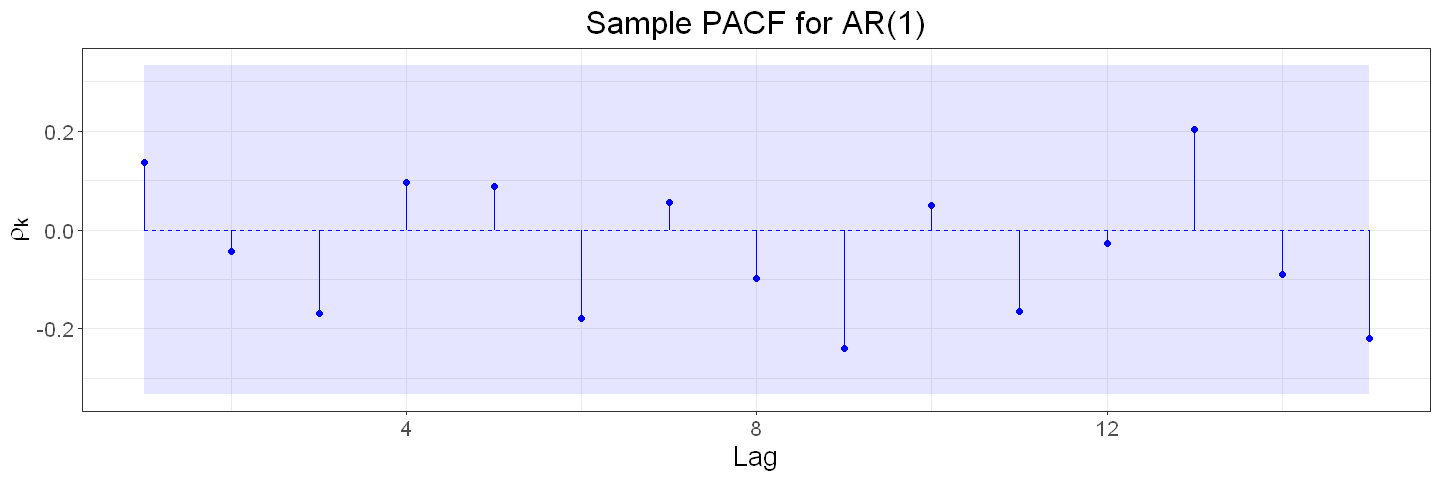

In [12]:
r = pacf(Y, lag.max=15, plot=F)$acf
se = 1 / sqrt(length(Y))
plot_acf_with_bounds(r, - 2 * se, + 2*se, title='Sample PACF for AR(1)')

No -- PACF suggests a white noise process.

In [13]:
estimate.ar1.mom <- function(x) {
    acf(x, lag.max=1, plot=F)$acf[2]
}

In [14]:
print(c('Method of moments estimate:  ', round(estimate.ar1.mom(Y), 5)), quote=F)
print(c('Maximum likelihood estimate: ', round(arima(Y, order=c(1,0,0), method='ML')$coef[[1]], 5)), quote=F)

[1] Method of moments estimate:   0.13605                      
[1] Maximum likelihood estimate:  0.13792                      


Both estimates provide values far away from the true value.

**(c)**

[1] Method of moments estimate:   0.10424                      
[1] Maximum likelihood estimate:  0.10154                      


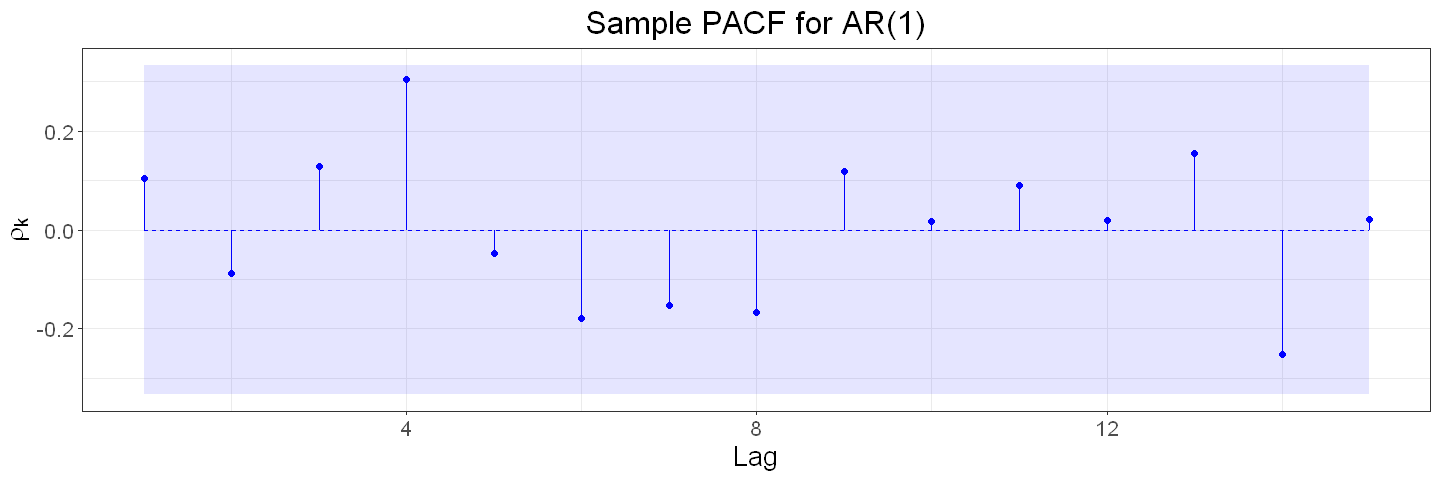

In [15]:
set.seed(2001)
Y = arima.sim(model=list(phi=0.6), n=36, innov=rchisq(36, 6))

r = pacf(Y, lag.max=15, plot=F)$acf
se = 1 / sqrt(length(Y))
plot_acf_with_bounds(r, - 2 * se, + 2*se, title='Sample PACF for AR(1)')

print(c('Method of moments estimate:  ', round(estimate.ar1.mom(Y), 5)), quote=F)
print(c('Maximum likelihood estimate: ', round(arima(Y, order=c(1,0,0), method='ML')$coef[[1]], 5)), quote=F)

PACF still suggests white noise, and the estimates are still very far away from the true value.

**Exercise 7.23**.  Simulate an MA(1) series with $\theta = −0.8$, $n = 60$ but with error terms from a chi-square distribution with 7 degrees of freedom.

**(a)** Display the sample ACF of the series. Is an MA(1) model suggested?

**(b)** Estimate $\theta$ from the series and comment on the results.

**(c)** Repeat parts (a) and (b) with a new simulated series under the same conditions.

**Solution**.

In [16]:
set.seed(100000)
Y = arima.sim(model=list(ma=0.8), n=60, innov=rchisq(60, 7))

**(a)**

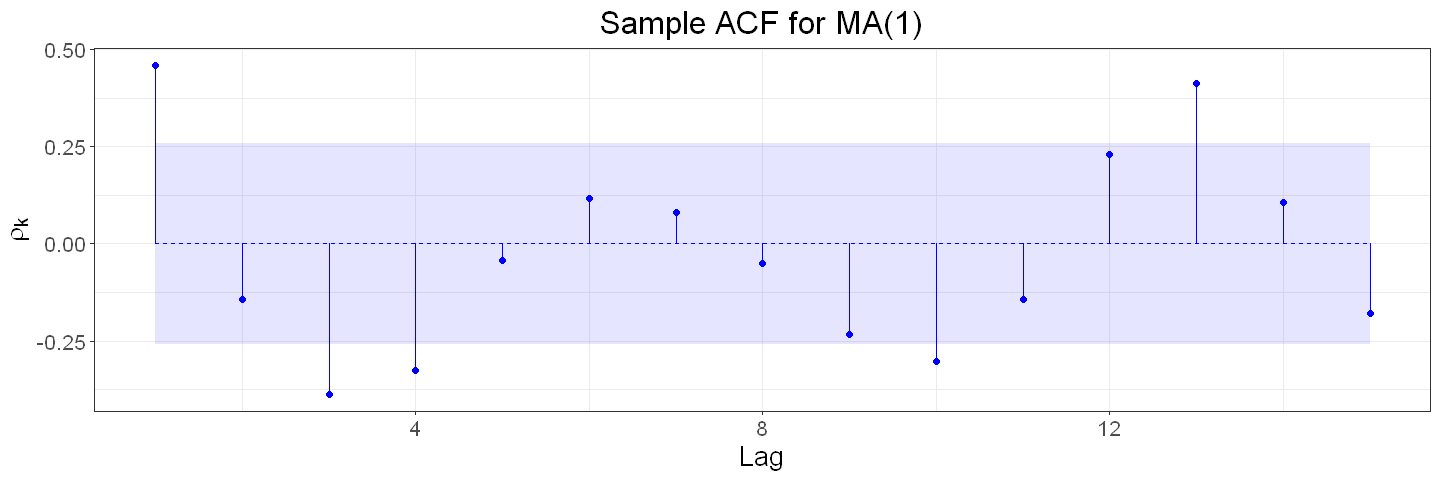

In [17]:
r = acf(Y, lag.max=15, plot=F)$acf[-1]
se = 1 / sqrt(length(Y))
plot_acf_with_bounds(r, - 2 * se, + 2*se, title='Sample ACF for MA(1)')

ACF suggests an MA(1) process, though oscillations suggest investigating lags at 3, 4, 10, and 13.

**(b)**

In [18]:
estimate.ma1.mom <- function(x) {
    r = acf(x, lag.max=1, plot=F)$acf[2]; 
    if (abs(r) < 0.5) {
        return((-1+sqrt(1-4*r^2))/(2*r)) 
    } else {
        return(NA)
    }
}

In [19]:
print(c('Method of moments estimate:  ', round(estimate.ma1.mom(Y), 5)), quote=F)
print(c('Maximum likelihood estimate: ', round(-arima(Y, order=c(0,0,1), method='ML')$coef[[1]], 5)), quote=F)

[1] Method of moments estimate:   -0.65849                     
[1] Maximum likelihood estimate:  -0.67828                     


Both estimates are somewhat close to the true value of $\theta = -0.8$.

**(c)**

[1] Method of moments estimate:   -0.41975                     
[1] Maximum likelihood estimate:  -0.75858                     


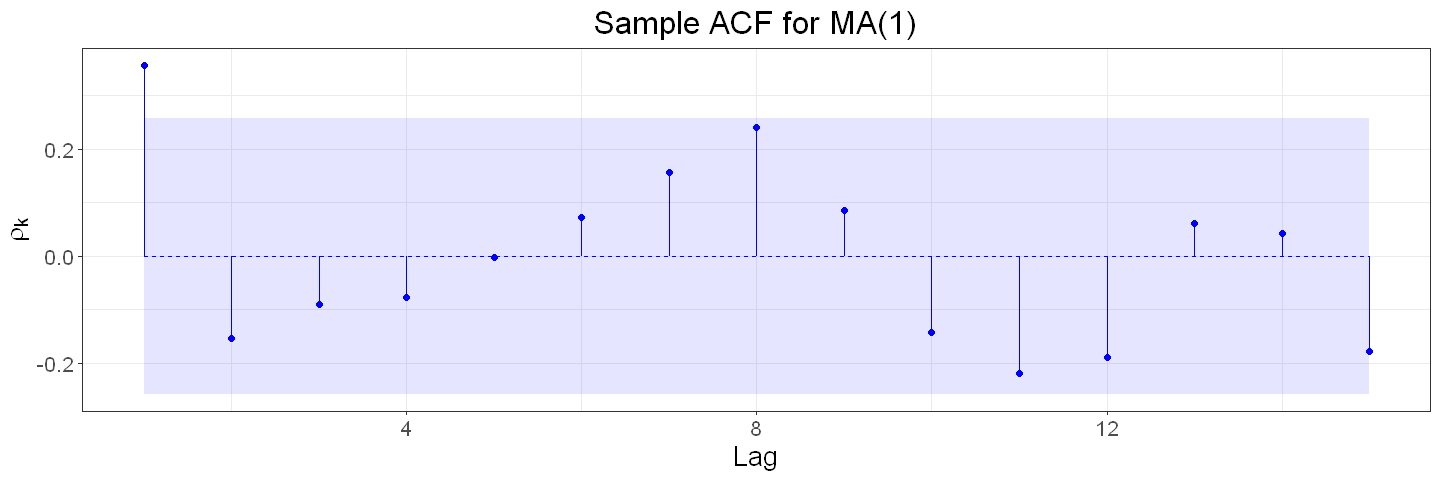

In [20]:
set.seed(100001)
Y = arima.sim(model=list(ma=0.8), n=60, innov=rchisq(60, 7))

r = acf(Y, lag.max=15, plot=F)$acf[-1]
se = 1 / sqrt(length(Y))
plot_acf_with_bounds(r, - 2 * se, + 2*se, title='Sample ACF for MA(1)')

print(c('Method of moments estimate:  ', round(estimate.ma1.mom(Y), 5)), quote=F)
print(c('Maximum likelihood estimate: ', round(-arima(Y, order=c(0,0,1), method='ML')$coef[[1]], 5)), quote=F)

This time the ACF does suggest an MA(1) process, and the maximum likelihood estimate is closer to the true value of $\theta = -0.8$.

**Exercise 7.24**.  Simulate an AR(2) series with $\phi_1 = 1.0$, $\phi_2 = −0.6$, $n = 48$ but with error terms from a chi-square distribution with 8 degrees of freedom.

**(a)** Display the sample PACF of the series. Is an AR(2) model suggested?

**(b)** Estimate $\phi_1$ and $\phi_2$ from the series and comment on the results.

**(c)** Repeat parts (a) and (b) with a new simulated series under the same conditions

**Solution**.

In [21]:
set.seed(2000)
Y = arima.sim(model=list(ar=c(1, -0.6)), n=48, innov=rchisq(60, 8))

**(a)**

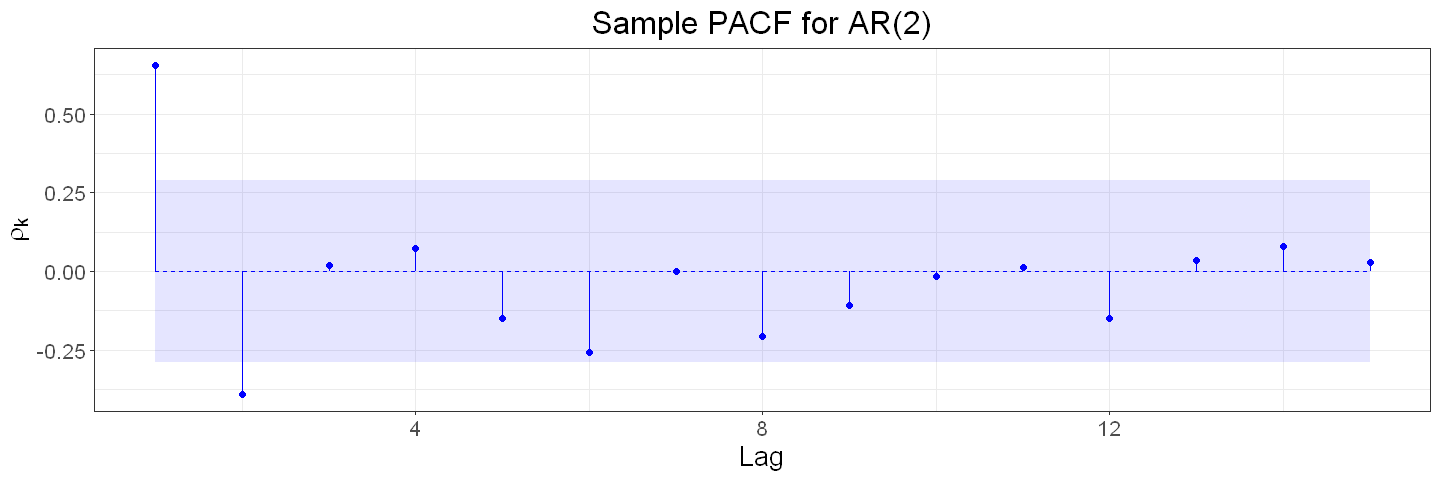

In [22]:
r = pacf(Y, lag.max=15, plot=F)$acf
se = 1 / sqrt(length(Y))
plot_acf_with_bounds(r, - 2 * se, + 2*se, title='Sample PACF for AR(2)')

Yes -- the PACF does suggest an AR(2) process.

**(b)**

In [23]:
estimate.ar2.mom <- function(x) {
    ar(x, aic=F, order.max=2, method='yw')[[2]]
}

In [24]:
phi = estimate.ar2.mom(Y)
print(c('Method of moments estimate (phi1): ', round(phi[1], 5)), quote=F)
print(c('Method of moments estimate (phi2): ', round(phi[2], 5)), quote=F)

phi = arima(Y, order=c(2,0,0), method='ML')$coef[-3]
print(c('Maximum likelihood estimate (phi1): ', round(phi[[1]], 5)), quote=F)
print(c('Maximum likelihood estimate (phi2): ', round(phi[[2]], 5)), quote=F)

[1] Method of moments estimate (phi1):  0.91107                            
[1] Method of moments estimate (phi2):  -0.39085                           
[1] Maximum likelihood estimate (phi1):  0.98565                             
[1] Maximum likelihood estimate (phi2):  -0.45385                            


The estimates for $\phi_1$ are close to the true value of $\phi_1 = 1$, while the estimates for $\phi_2$ are not as close to the true value of $\phi_2 = -0.6$.

**(c)**

[1] Method of moments estimate (phi1):  0.93905                            
[1] Method of moments estimate (phi2):  -0.61723                           
[1] Maximum likelihood estimate (phi1):  0.98172                             
[1] Maximum likelihood estimate (phi2):  -0.64633                            


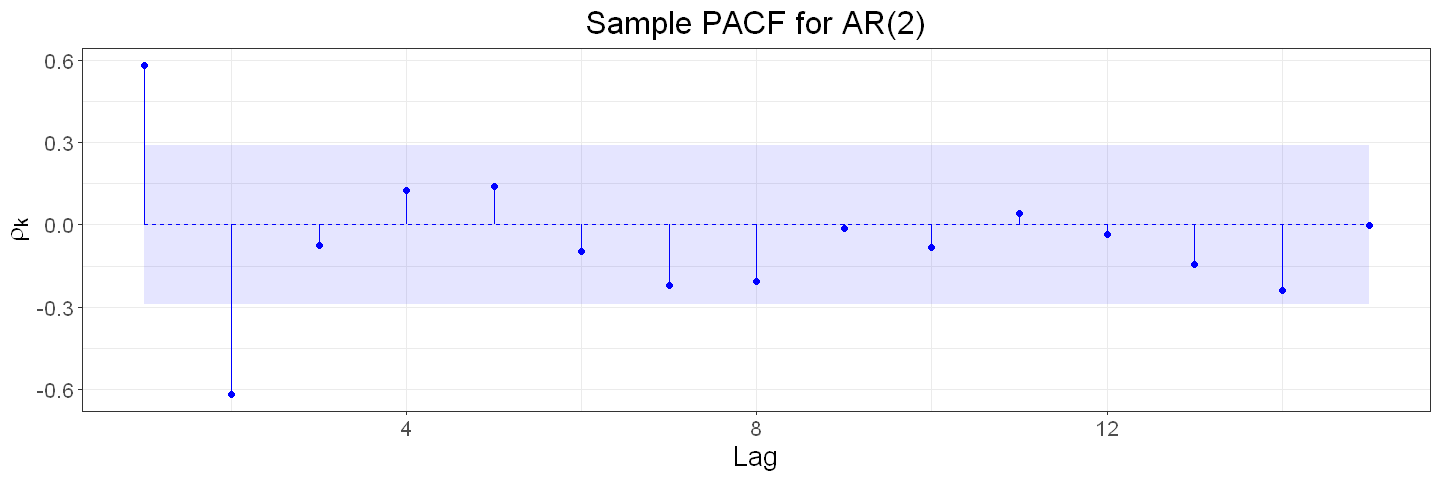

In [25]:
set.seed(2001)
Y = arima.sim(model=list(ar=c(1, -0.6)), n=48, innov=rchisq(60, 8))

r = pacf(Y, lag.max=15, plot=F)$acf
se = 1 / sqrt(length(Y))
plot_acf_with_bounds(r, - 2 * se, + 2*se, title='Sample PACF for AR(2)')

phi = estimate.ar2.mom(Y)
print(c('Method of moments estimate (phi1): ', round(phi[1], 5)), quote=F)
print(c('Method of moments estimate (phi2): ', round(phi[2], 5)), quote=F)

phi = arima(Y, order=c(2,0,0), method='ML')$coef[-3]
print(c('Maximum likelihood estimate (phi1): ', round(phi[[1]], 5)), quote=F)
print(c('Maximum likelihood estimate (phi2): ', round(phi[[2]], 5)), quote=F)

The PACF again indicates an AR(2) process.

The estimates are this time closer to the true value, with the method of moments providing a better estimate for $\phi_2$ and the maximum likelihood providing a better estimate for $\phi_1$.

**Exercise 7.25**.  Simulate an ARMA(1,1) series with $\phi = 0.7$, $\theta = −0.6$, $n = 48$ but with error terms from a chi-square distribution with 9 degrees of freedom.

**(a)** Display the sample EACF of the series. Is an ARMA(1,1) model suggested?

**(b)** Estimate $\phi$ and $\theta$ from the series and comment on the results.

**(c)** Repeat parts (a) and (b) with a new series under the same conditions.

**Solution**.

In [26]:
set.seed(10000)
Y = arima.sim(model=list(phi=0.7, ma=0.6), n=48, innov=rchisq(48, 9))

**(a)**

In [27]:
eacf(Y)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x x x o o o o o o o o  o  o  o 
1 x x x o o o o o o o o  o  o  o 
2 o o o o o o o o o o o  o  o  o 
3 o o o o o o o o o o o  o  o  o 
4 o x o o o o o o o o o  o  o  o 
5 o x o o o o o o o o o  o  o  o 
6 x o o o o o o o o o o  o  o  o 
7 x o o o o o o o o o o  o  o  o 


No -- EACF suggests an AR(2) model instead of an ARMA(1, 1) model.

**(b)**

In [28]:
res = estimate.arma11.mom(Y)
print(c('Method of moments estimate (phi): ', round(res[1], 5)), quote=F)
print(c('Method of moments estimate (theta): ', round(res[2], 5)), quote=F)

res = arima(Y, order=c(1,0,1), method='ML')$coef
print(c('Maximum likelihood estimate (phi): ', round(res[[1]], 5)), quote=F)
print(c('Maximum likelihood estimate (theta): ', round(-res[[2]], 5)), quote=F)

[1] Method of moments estimate (phi):  -1.12766                          
[1] Method of moments estimate (theta):  -0.77289                            
[1] Maximum likelihood estimate (phi):  -0.13138                           
[1] Maximum likelihood estimate (theta):  -0.72356                             


Estimates on both methods seem to be fairly off the true value for $\phi$, but to provide a reasonable value for $\theta$.

**(c)**

In [29]:
set.seed(10001)
Y = arima.sim(model=list(phi=0.7, ma=0.6), n=48, innov=rchisq(48, 9))

eacf(Y)

res = estimate.arma11.mom(Y)
print(c('Method of moments estimate (phi): ', round(res[1], 5)), quote=F)
print(c('Method of moments estimate (theta): ', round(res[2], 5)), quote=F)

res = arima(Y, order=c(1,0,1), method='ML')$coef
print(c('Maximum likelihood estimate (phi): ', round(res[[1]], 5)), quote=F)
print(c('Maximum likelihood estimate (theta): ', round(-res[[2]], 5)), quote=F)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x o o o o o o o o o o  o  o  o 
1 x x o o o o o o o o o  o  o  o 
2 x o o o o o o o o o o  o  o  o 
3 o o o o o o o o o o o  o  o  o 
4 o x x o o o o o o o o  o  o  o 
5 o x x o o o o o o o o  o  o  o 
6 o o x o o o o o o o o  o  o  o 
7 x o x o o o o o o o o  o  o  o 
[1] Method of moments estimate (phi):  0.04604                           
[1] Method of moments estimate (theta):  -0.55119                            
[1] Maximum likelihood estimate (phi):  0.15409                            
[1] Maximum likelihood estimate (theta):  -0.50511                             


Again EACF suggests a MA(1) model.

Estimates for $\phi$ are very far from the true value, while thee estimates for $\theta$ are not too far from the true value.